In [14]:
# Test imports to ensure all packages are working
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("All packages imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

All packages imported successfully!
NumPy version: 2.3.3
Pandas version: 2.3.2


In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#  skipping the header comments
# The cumulative file needs 53 rows skipped to get to the header
cumulative_df = pd.read_csv(r"./datasets/cumulative_2025.09.24_07.35.38.csv", skiprows=53)

# The k2 file needs 98 rows skipped
k2_df = pd.read_csv(r"./datasets/k2pandc_2025.09.24_07.36.33.csv", skiprows=98)

# The toi file needs 69 rows skipped
toi_df = pd.read_csv(r"./datasets/TOI_2025.09.24_07.36.03.csv", skiprows=69)

# You can now display the first few rows to confirm they loaded correctly
print(cumulative_df.head())
print(k2_df.head())
print(toi_df.head())
# Merge into one dataset
all_data = pd.concat([k2_df, cumulative_df, toi_df], ignore_index=True)

# Save merged dataset
all_data.to_csv("./datasets/exoplanets_merged.csv", index=False)

      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \


In [16]:
df = pd.read_csv(r"./datasets/exoplanets_merged.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_3044\2402524551.py:1: DtypeWarning: Columns (0,1,3,4,7,9,10,12,37,51,52,69,74,75,77,91,92,93,95,96,97,98,130,143,172) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"./datasets/exoplanets_merged.csv")


In [17]:
df.head()

,pl_name,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,...,pl_trandeplim,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_dist,st_disterr1,st_disterr2,st_distlim,toi_created
0,BD+20 594 b,BD+20 594,0.0,CONFIRMED,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BD+20 594 b,BD+20 594,0.0,CONFIRMED,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BD+20 594 b,BD+20 594,1.0,CONFIRMED,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPIC 201111557.01,EPIC 201111557,0.0,CANDIDATE,Livingston et al. 2018,1.0,0.0,Transit,2018.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EPIC 201111557.01,EPIC 201111557,1.0,CANDIDATE,Livingston et al. 2018,1.0,0.0,Transit,2018.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(21224, 173)

In [19]:
df.isnull().sum()

pl_name         17232
hostname        17232
default_flag    17232
disposition     17232
disp_refname    17232
                ...  
st_dist         13771
st_disterr1     14262
st_disterr2     14262
st_distlim      13556
toi_created     13556
Length: 173, dtype: int64

In [44]:
keep_cols = ['pl_name', 'hostname', 'default_flag', 'disposition', 'disp_refname']

threshold = len(df) * 0.4
cols_to_keep = [col for col in df.columns if df[col].count() >= threshold]

usable_cols = list(set(keep_cols).union(set(cols_to_keep)))

df = df[usable_cols].copy()

# Handle numerical columns - build all new columns at once
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(keep_cols, errors='ignore')

new_cols_dict = {}
for col in num_cols:
    median_val = df[col].median()
    missing_flag_col = col + '_missing'
    new_cols_dict[missing_flag_col] = df[col].isnull().astype(int)
    df[col] = df[col].fillna(median_val)

if new_cols_dict:
    df = pd.concat([df, pd.DataFrame(new_cols_dict, index=df.index)], axis=1)

cat_cols = df.select_dtypes(include=['object']).columns.drop(['disposition', 'pl_name', 'hostname'], errors='ignore')

for col in cat_cols:
    if not df[col].mode().empty:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

df.to_csv('./datasets/exoplanet_cleaned.csv', index=False)

print("Data cleaning and imputation complete. Cleaned file saved as 'exoplanet_cleaned.csv'.")

Data cleaning and imputation complete. Cleaned file saved as 'exoplanet_cleaned.csv'.


In [21]:
df = pd.read_csv('./datasets/exoplanet_cleaned.csv', low_memory=False)


In [22]:
df.head()

,rastr,st_raderr1,koi_steff_err2,koi_model_snr,st_logglim,kepoi_name,koi_time0bk_err1,pl_radeerr1,koi_depth_err1,koi_steff,...,koi_insol_missing,pl_orbper_missing,koi_srad_err2_missing,koi_srad_missing,koi_slogg_err2_missing,st_logg_missing,koi_time0bk_missing,koi_srad_err1_missing,koi_fpflag_ss_missing,koi_fpflag_nt_missing
0,03h34m36.27s,0.098585,-160.0,23.0,0.0,K00001.01,0.00413,0.310000,20.75,5767.0,...,1,0,1,1,1,0,1,1,1,1
1,03h34m36.27s,0.055000,-160.0,23.0,0.0,K00001.01,0.00413,0.140000,20.75,5767.0,...,1,0,1,1,1,0,1,1,1,1
2,03h34m36.27s,0.060000,-160.0,23.0,0.0,K00001.01,0.00413,0.112090,20.75,5767.0,...,1,0,1,1,1,0,1,1,1,1
3,12h15m23.10s,0.018609,-160.0,23.0,0.0,K00001.01,0.00413,0.524177,20.75,5767.0,...,1,0,1,1,1,0,1,1,1,1
4,12h15m23.10s,0.053651,-160.0,23.0,0.0,K00001.01,0.00413,0.110000,20.75,5767.0,...,1,0,1,1,1,0,1,1,1,1


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:

non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Non-numeric columns to drop or encode:", non_numeric_cols)


df_numerical = df.drop(columns=non_numeric_cols)


scaler.fit(df_numerical)

Non-numeric columns to drop or encode: ['rastr', 'kepoi_name', 'rowupdate', 'hostname', 'disp_refname', 'pl_name', 'koi_tce_delivname', 'disposition', 'decstr', 'koi_pdisposition', 'koi_disposition']


,copy,True
,with_mean,True
,with_std,True


In [26]:
df_numerical

,st_raderr1,koi_steff_err2,koi_model_snr,st_logglim,koi_time0bk_err1,pl_radeerr1,koi_depth_err1,koi_steff,koi_insol_err1,pl_radelim,...,koi_insol_missing,pl_orbper_missing,koi_srad_err2_missing,koi_srad_missing,koi_slogg_err2_missing,st_logg_missing,koi_time0bk_missing,koi_srad_err1_missing,koi_fpflag_ss_missing,koi_fpflag_nt_missing
0,0.098585,-160.0,23.0,0.0,0.00413,0.310000,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,0,1,1,1,1
1,0.055000,-160.0,23.0,0.0,0.00413,0.140000,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,0,1,1,1,1
2,0.060000,-160.0,23.0,0.0,0.00413,0.112090,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,0,1,1,1,1
3,0.018609,-160.0,23.0,0.0,0.00413,0.524177,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,0,1,1,1,1
4,0.053651,-160.0,23.0,0.0,0.00413,0.110000,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21219,0.060000,-160.0,23.0,0.0,0.00413,0.607224,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,1,1,1,1,1
21220,0.060000,-160.0,23.0,0.0,0.00413,0.607224,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,1,1,1,1,1
21221,0.045789,-160.0,23.0,0.0,0.00413,5.176719,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,0,1,1,1,1
21222,0.091578,-160.0,23.0,0.0,0.00413,3.991979,20.75,5767.0,72.83,0.0,...,1,0,1,1,1,0,1,1,1,1


In [27]:
df.columns

Index(['rastr', 'st_raderr1', 'koi_steff_err2', 'koi_model_snr', 'st_logglim',
       'kepoi_name', 'koi_time0bk_err1', 'pl_radeerr1', 'koi_depth_err1',
       'koi_steff',
       ...
       'koi_insol_missing', 'pl_orbper_missing', 'koi_srad_err2_missing',
       'koi_srad_missing', 'koi_slogg_err2_missing', 'st_logg_missing',
       'koi_time0bk_missing', 'koi_srad_err1_missing', 'koi_fpflag_ss_missing',
       'koi_fpflag_nt_missing'],
      dtype='object', length=130)

In [28]:
df.isnull().sum()

rastr                    0
st_raderr1               0
koi_steff_err2           0
koi_model_snr            0
st_logglim               0
                        ..
st_logg_missing          0
koi_time0bk_missing      0
koi_srad_err1_missing    0
koi_fpflag_ss_missing    0
koi_fpflag_nt_missing    0
Length: 130, dtype: int64

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Identify data types 
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical Columns: {len(numerical_cols)}")
print(f"Categorical Columns: {len(categorical_cols)}")

Numerical Columns: 119
Categorical Columns: 11


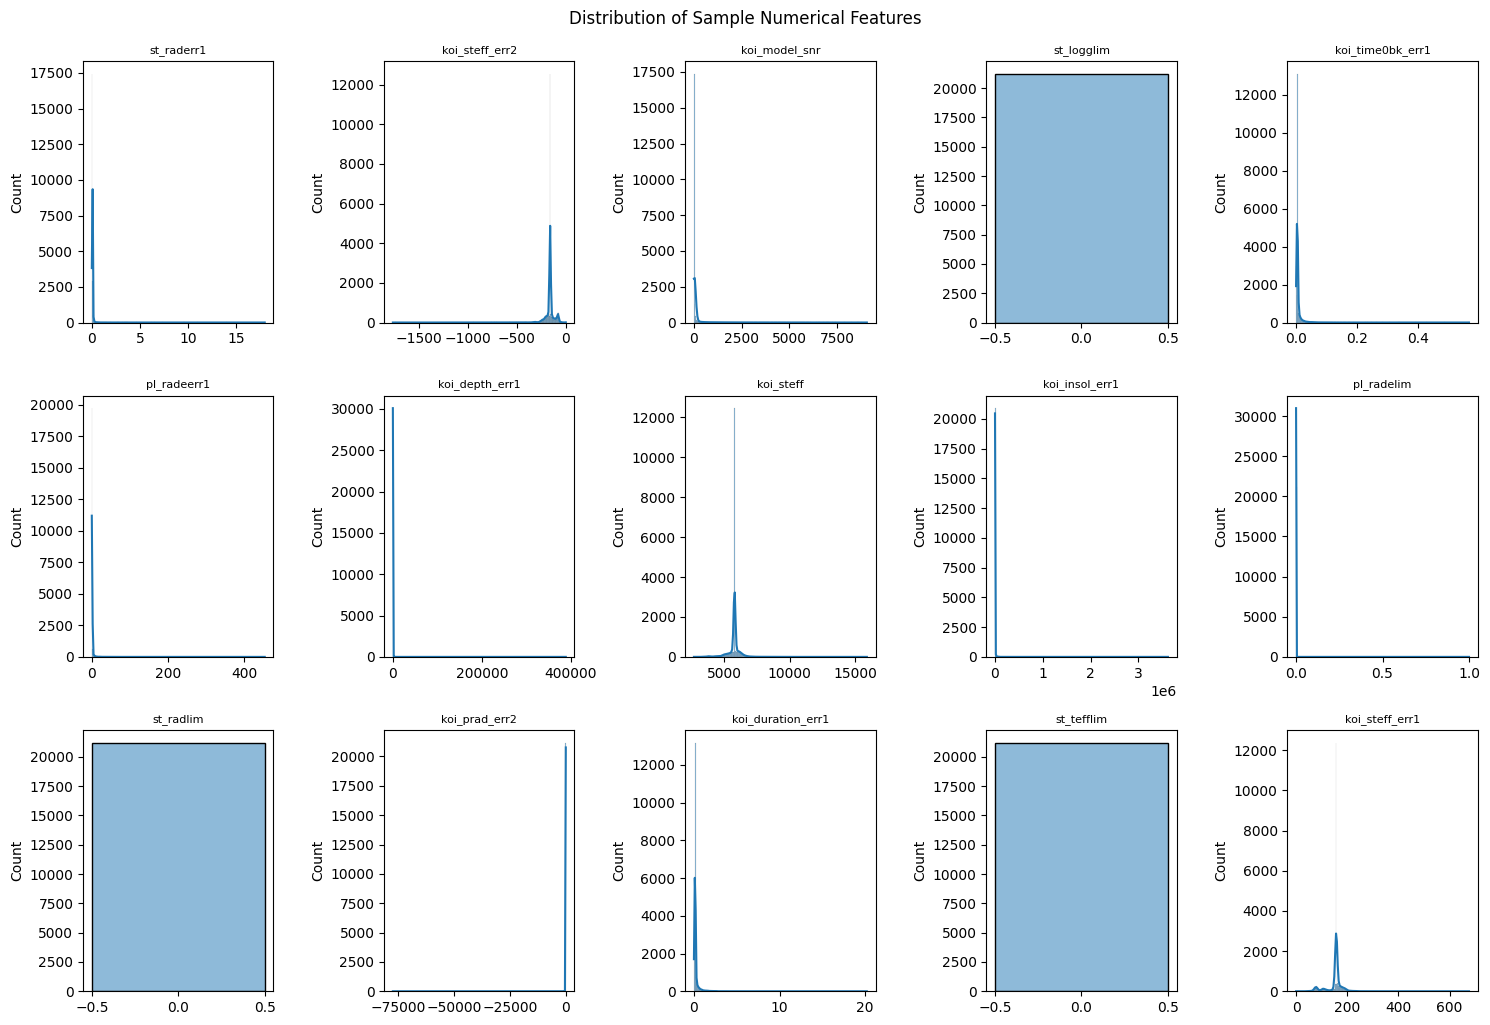

In [30]:
# Select a sample of numerical columns to visualize
sample_numerical_cols = numerical_cols[:15]

# Plotting distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(sample_numerical_cols):
    plt.subplot(3, 5, i + 1) # Create a 3x5 grid of plots
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col, fontsize=8)
    plt.xlabel("")
    plt.tight_layout() # Adjust layout to prevent overlap

plt.suptitle("Distribution of Sample Numerical Features", y=1.02)
plt.show()

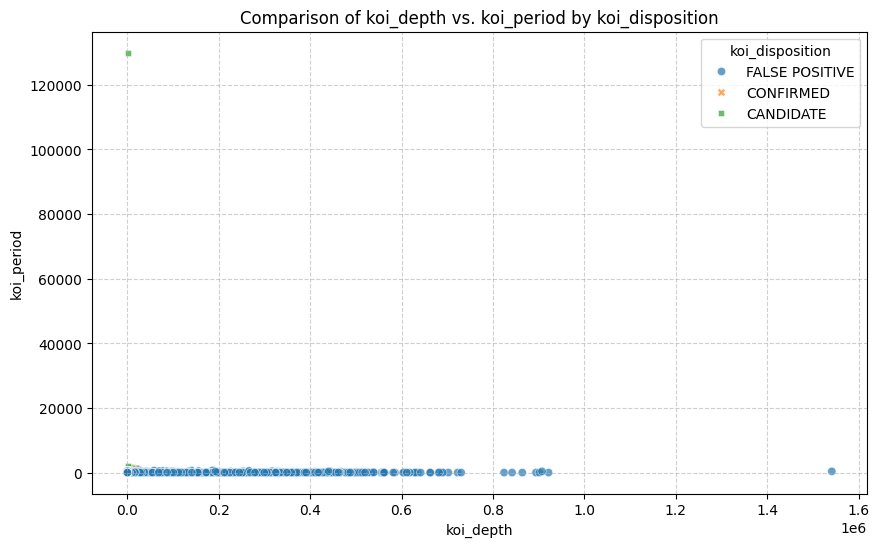

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming:
# df is your DataFrame
# target_col is your target variable (e.g., 'koi_disposition')
# feature1 is the first deposition/feature (e.g., 'koi_depth')
# feature2 is the second deposition/feature (e.g., 'koi_period')

target_col = 'koi_disposition'
feature1 = 'koi_depth'
feature2 = 'koi_period'

# 1. Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x=feature1,          # Feature 1 on the X-axis
    y=feature2,          # Feature 2 on the Y-axis
    hue=target_col,      # Target Variable dictates the color of the points
    style=target_col,    # Target Variable dictates the shape of the points (optional but helpful)
    alpha=0.7            # Set transparency for better visibility in dense areas
)

# 2. Add titles and labels
plt.title(f'Comparison of {feature1} vs. {feature2} by {target_col}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title=target_col)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

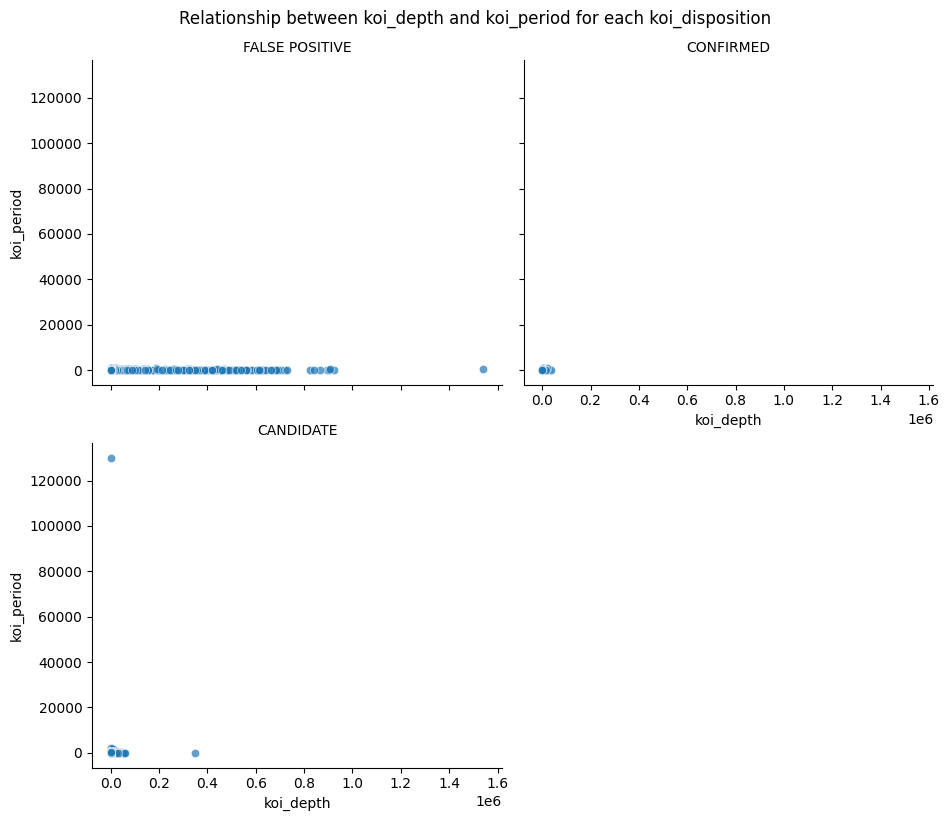

In [32]:
# Create a FacetGrid
g = sns.FacetGrid(
    df,
    col=target_col,       # Split the plot by the target variable
    col_wrap=2,           # Wrap to 2 columns for a cleaner look
    height=4,
    aspect=1.2
)

# Map the scatter plot onto each subplot
g.map(sns.scatterplot, feature1, feature2, alpha=0.7)

# Add titles
g.set_titles(col_template="{col_name}")
plt.suptitle(f'Relationship between {feature1} and {feature2} for each {target_col}', y=1.02)
plt.show()

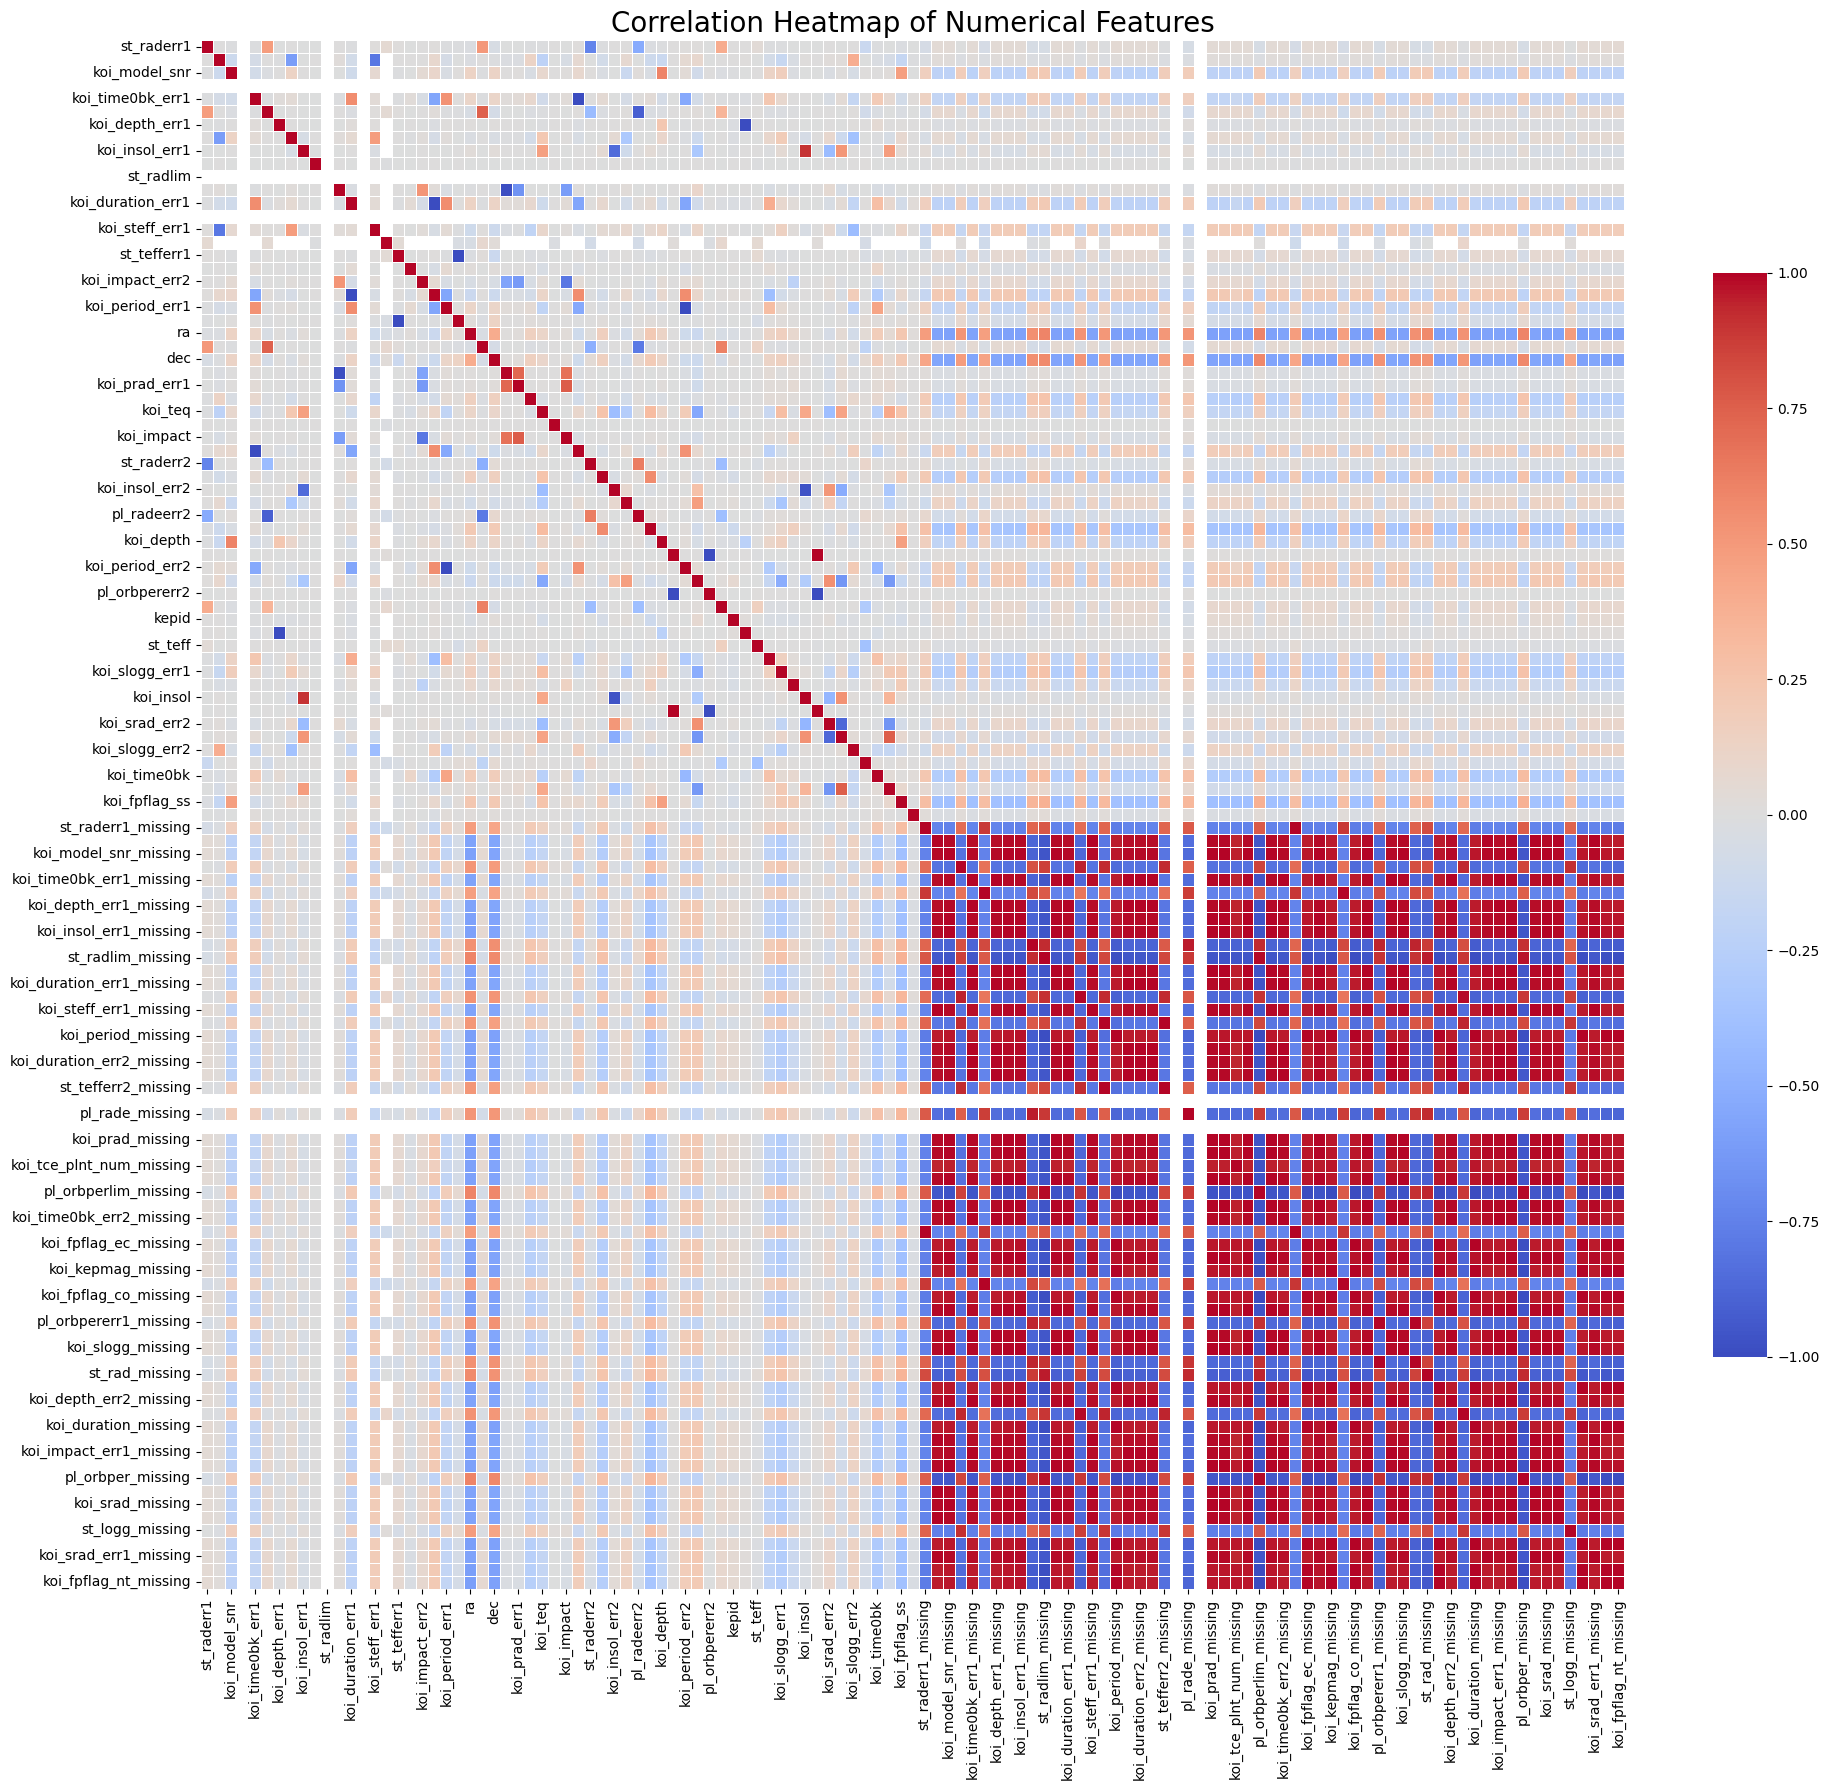

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Select Only Numerical Columns ---
# Heatmaps work only on numerical data.
df_numerical = df.select_dtypes(include=np.number)

# --- 2. Calculate the Correlation Matrix ---
# The .corr() method calculates the Pearson correlation coefficient between all pairs of numerical columns.
corr_matrix = df_numerical.corr()

# --- 3. Generate the Heatmap ---
plt.figure(figsize=(20, 18))

# Use annot=False for large datasets (like 130 columns) to keep the plot readable.
# Set annot=True only for a smaller subset of columns (e.g., fewer than 20).
# The 'coolwarm' colormap is excellent for showing both positive (red) and negative (blue) correlations.
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    fmt=".2f", # Format the annotations to two decimal places
    linewidths=.5, # Adds lines between cells for clarity
    cbar_kws={'shrink': 0.7} # Shrink the color bar size
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=20)
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show() # In a real environment, you'd save it or show it.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [35]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [36]:
import pandas as pd
target_column_name = 'koi_disposition' 
y = df[target_column_name]
X = df.drop(columns=[target_column_name])

print(f"Shape of X (Features): {X.shape}")
print(f"Shape of y (Target): {y.shape}")

Shape of X (Features): (21224, 129)
Shape of y (Target): (21224,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [39]:
# Models
# A. Imputation (Fills NaNs with the mean) - FIXES ValueError
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# B. Scaling (Standardization) - FIXES ConvergenceWarning for Linear Models
scaler = StandardScaler()
# X_train and X_test are now ready for model training
X_train = scaler.fit_transform(X_train_imputed)
X_test = scaler.transform(X_test_imputed)


# --- 3. MODEL DEFINITION (Your specified models) ---
# Note: Increased max_iter for Logistic Regression to prevent the warning.

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes' : GaussianNB()
}
    

     


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
# Train, predict, evaluate

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)

In [42]:
print(score)

0.888339222614841
